In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import ipywidgets



In [2]:
def get_float_input(prompt):
    while True:
        try:
            value = float(input(prompt))
            return value
        except ValueError:
            print("Invalid input: please enter a numeric value.")


In [3]:
K_s    = get_float_input("Enter the desired K_s value: ")
Y_xs   = get_float_input("Enter the desired Y_xs value: ")
mu_max = get_float_input("Enter the desired mu_max value: ")


Enter the desired K_s value:  0.2
Enter the desired Y_xs value:  0.06
Enter the desired mu_max value:  0.3


<class 'numpy.ndarray'>
0.2615889360201312
0.72


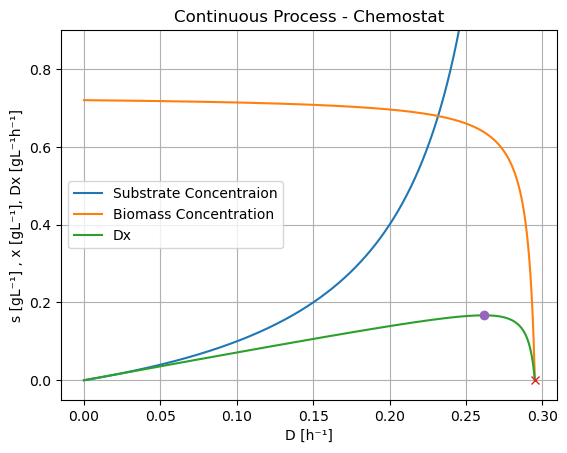

In [4]:
#K_s = 0.2
#Y_xs = 0.06
#mu_max = 0.3
s_in = 12

Dcrit = mu_max * (s_in / (K_s + s_in))
Dopt = mu_max * ( 1 - (math.sqrt( K_s / (K_s +s_in))))
s = np.arange(0.0, s_in, 0.0001) 

D = mu_max * (s / (K_s + s))
x = Y_xs * ( s_in - s)
Dx = ( mu_max * (s / (K_s + s))) * (Y_xs * ( s_in - s))

print (type(D))
print (Dopt)
print (max(x))

plt.plot(D,s, label = "Substrate Concentraion")
plt.plot(D, x , label = "Biomass Concentration")
plt.plot(D, Dx , label = "Dx")
plt.plot(Dcrit,0.0, marker = 'x')
plt.plot(Dopt, np.max(Dx), marker = 'o')


plt.ylim([-0.05 ,Y_xs * ( s_in - s[0]+ 3)])

plt.legend() 
plt.title("Continuous Process - Chemostat")
plt.xlabel("D [h⁻¹]")
plt.ylabel("s [gL⁻¹] , x [gL⁻¹], Dx [gL⁻¹h⁻¹]")
plt.grid(True)
plt.show()

In [5]:
K_s = 0.2
Y_xs = 0.06
mu_max = 0.3
s_in = 50

Dcrit = mu_max * (s_in / (K_s + s_in))
Dopt = mu_max * ( 1 - (math.sqrt( K_s / (K_s +s_in))))
D = np.arange(0.00, Dcrit, 0.0001) 

#D = mu_max * (s / (K_s + s))

s = K_s * (D/(mu_max-D))
x = Y_xs * ( s_in - s)
Dx = D * (Y_xs * ( s_in - s))

print (type(D))
print (x[0])
print (Dopt)
print (Dcrit)

<class 'numpy.ndarray'>
3.0
0.2810641679070659
0.298804780876494


In [6]:
# IntSlider
# square number
s_in = 0

slider = ipywidgets.IntSlider(value=5,
                              min=0,
                              max=10,
                              step=1,
                              description='Square:',
                              disabled=False,
                              continuous_update=False,
                              orientation='horizontal',
                              readout=True,
                              readout_format='d')

def square1(number):
    return number*number

ipywidgets.interact(square1, number=slider);

interactive(children=(IntSlider(value=5, continuous_update=False, description='Square:', max=10), Output()), _…

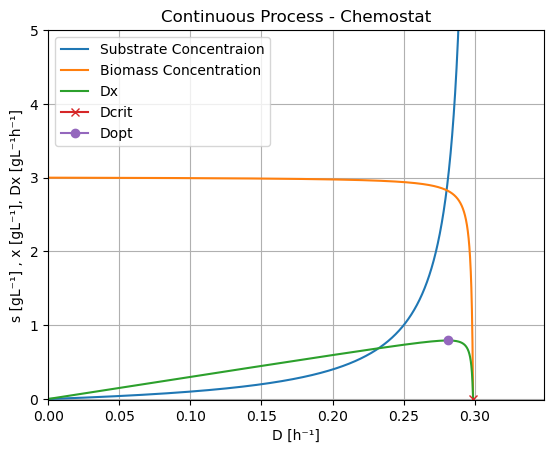

In [7]:
plt.plot(D,s, label = "Substrate Concentraion")
plt.plot(D, x , label = "Biomass Concentration")
plt.plot(D, Dx , label = "Dx")
plt.plot(Dcrit,0.0, marker = 'x',label = "Dcrit")
plt.plot(Dopt, np.max(Dx), marker = 'o',label = "Dopt")

plt.xlim([0.0, Dcrit + 0.05])
plt.ylim([-0.01 ,5])

plt.legend() 
plt.title("Continuous Process - Chemostat")
plt.xlabel("D [h⁻¹]")
plt.ylabel("s [gL⁻¹] , x [gL⁻¹], Dx [gL⁻¹h⁻¹]")
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import math
import plotly.graph_objs as go
from plotly.subplots import make_subplots

K_s = 0.2
Y_xs = 0.06
mu_max = 0.3
s_in = 12

Dcrit = mu_max * (s_in / (K_s + s_in))
Dopt = mu_max * (1 - (math.sqrt(K_s / (K_s + s_in))))
s = np.arange(0.0, s_in, 0.0001)

D = mu_max * (s / (K_s + s))
x = Y_xs * (s_in - s)
Dx = (mu_max * (s / (K_s + s))) * (Y_xs * (s_in - s))

fig = go.Figure()

fig.add_trace(go.Scatter(x=D, y=x, mode='lines', name='Biomass Concentration'))
fig.add_trace(go.Scatter(x=D, y=Dx, mode='lines', name='Dx'))
fig.add_trace(go.Scatter(x=D, y=s, mode='lines', name='Substrate Concentration'))

fig.update_layout(
    title='Chemostat Analysis',
    xaxis_title='Dilution Rate (D)',
    yaxis_title='Concentration',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

fig.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import math

Y_xs = 0.06
mu_max = 0.3
s_in = 12

K_s = 0.2
Dcrit = mu_max * (s_in / (K_s + s_in))
Dopt = mu_max * (1 - (math.sqrt(K_s / (K_s + s_in))))
s = np.arange(0.0, s_in, 0.0001) 

def plot_graph(x_multiplier):
    D = mu_max * (s / (K_s + s))
    x = Y_xs * (s_in - s) * x_multiplier
    Dx = (mu_max * (s / (K_s + s))) * x  # Updated this line to use the new 'x'

    plt.figure(figsize=(10, 6))
    plt.plot(D, s, label="Substrate Concentration")
    plt.plot(D, x, label="Biomass Concentration")
    plt.plot(D, Dx, label="Dx")
    plt.plot(Dcrit, 0.0, marker='x')
    plt.plot(Dopt, np.max(Dx), marker='o')

    plt.ylim([-0.05, (Y_xs * (s_in - s[0] + 3)) + 0.5 ]  )

    plt.legend()
    plt.title("Continuous Process - Chemostat")
    plt.xlabel("D [h⁻¹]")
    plt.ylabel("s [gL⁻¹] , x [gL⁻¹], Dx [gL⁻¹h⁻¹]")
    plt.grid(True)
    plt.show()

interact(plot_graph, x_multiplier=FloatSlider(value=1, min=0, max=2, step=0.01, description='x Multiplier'));
